In [1]:
# for general dataframe editing
import pandas as pd
import numpy as np

# for plotting
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# for pca and pcr
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
from numpy.linalg import eig



### Data Setup and Cleaning

In [2]:
# import data
data = pd.read_csv('train.csv')
data_elements = pd.read_csv('unique_m.csv')

# look at dataset dimensions and first few observations
print(data.shape)
print(data_elements.shape)
data.head()

(21263, 82)
(21263, 88)


,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.257143,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,2.257143,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.271429,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.264286,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.242857,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.0


### Exploratory Data Analysis

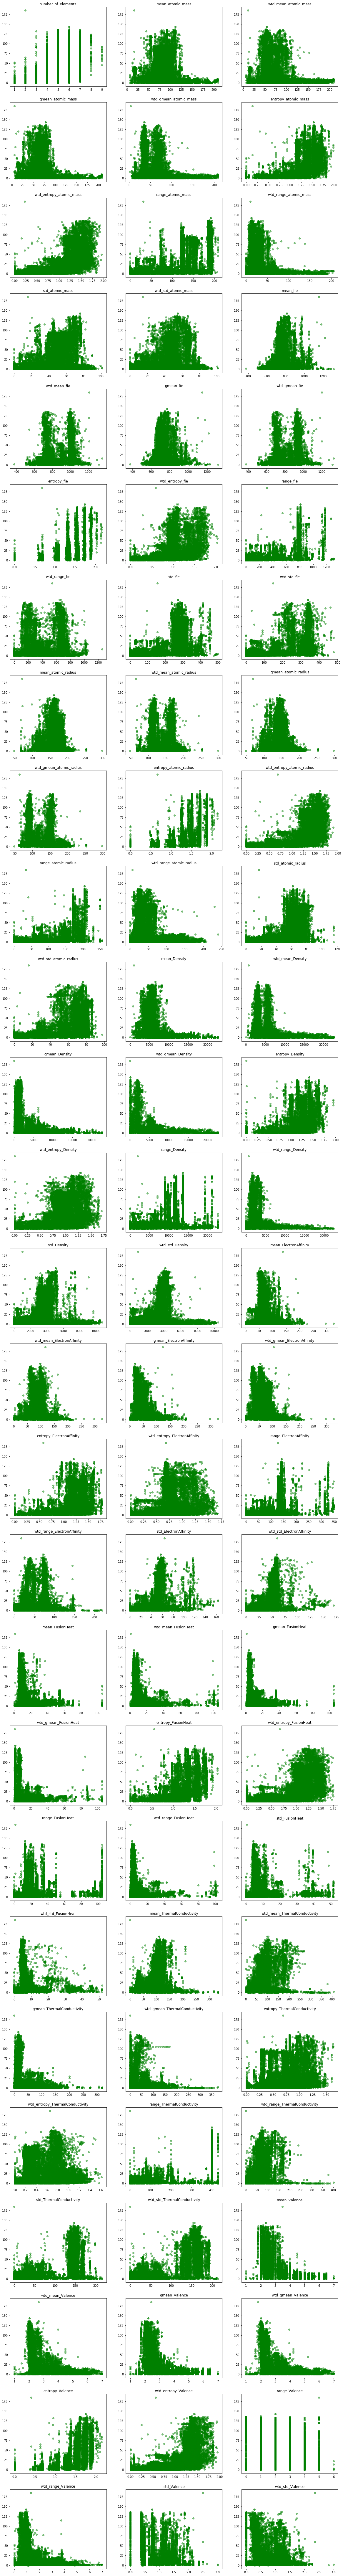

In [3]:
# list of all the predictor variables
predictors = ['number_of_elements', 'mean_atomic_mass', 'wtd_mean_atomic_mass',
       'gmean_atomic_mass', 'wtd_gmean_atomic_mass', 'entropy_atomic_mass',
       'wtd_entropy_atomic_mass', 'range_atomic_mass', 'wtd_range_atomic_mass',
       'std_atomic_mass', 'wtd_std_atomic_mass', 'mean_fie', 'wtd_mean_fie',
       'gmean_fie', 'wtd_gmean_fie', 'entropy_fie', 'wtd_entropy_fie',
       'range_fie', 'wtd_range_fie', 'std_fie', 'wtd_std_fie',
       'mean_atomic_radius', 'wtd_mean_atomic_radius', 'gmean_atomic_radius',
       'wtd_gmean_atomic_radius', 'entropy_atomic_radius',
       'wtd_entropy_atomic_radius', 'range_atomic_radius',
       'wtd_range_atomic_radius', 'std_atomic_radius', 'wtd_std_atomic_radius',
       'mean_Density', 'wtd_mean_Density', 'gmean_Density',
       'wtd_gmean_Density', 'entropy_Density', 'wtd_entropy_Density',
       'range_Density', 'wtd_range_Density', 'std_Density', 'wtd_std_Density',
       'mean_ElectronAffinity', 'wtd_mean_ElectronAffinity',
       'gmean_ElectronAffinity', 'wtd_gmean_ElectronAffinity',
       'entropy_ElectronAffinity', 'wtd_entropy_ElectronAffinity',
       'range_ElectronAffinity', 'wtd_range_ElectronAffinity',
       'std_ElectronAffinity', 'wtd_std_ElectronAffinity', 'mean_FusionHeat',
       'wtd_mean_FusionHeat', 'gmean_FusionHeat', 'wtd_gmean_FusionHeat',
       'entropy_FusionHeat', 'wtd_entropy_FusionHeat', 'range_FusionHeat',
       'wtd_range_FusionHeat', 'std_FusionHeat', 'wtd_std_FusionHeat',
       'mean_ThermalConductivity', 'wtd_mean_ThermalConductivity',
       'gmean_ThermalConductivity', 'wtd_gmean_ThermalConductivity',
       'entropy_ThermalConductivity', 'wtd_entropy_ThermalConductivity',
       'range_ThermalConductivity', 'wtd_range_ThermalConductivity',
       'std_ThermalConductivity', 'wtd_std_ThermalConductivity',
       'mean_Valence', 'wtd_mean_Valence', 'gmean_Valence',
       'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_Valence',
       'range_Valence', 'wtd_range_Valence', 'std_Valence', 'wtd_std_Valence']


# making scatter plots for each predictor and the response 
plt.figure(figsize=(20,160))
for i,j in enumerate(predictors):
    plt.subplot(27,3,i+1)
    plt.scatter(data[j],data["critical_temp"], color = 'g', alpha = 0.5)
    plt.title(predictors[i])
plt.show()

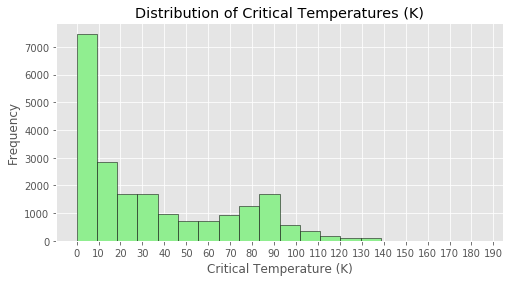

In [4]:
# looking at distribution of response variable

# setting plot style similar to R's ggplot
plt.style.use('ggplot')

# setting size of the plot
plt.figure(figsize = (8,4))

# plotting a histogram
plt.hist(data['critical_temp'].values, bins = 20,
        color = 'lightgreen',
        edgecolor = 'k')
plt.xlabel('Critical Temperature (K)')
plt.ylabel('Frequency')
plt.title('Distribution of Critical Temperatures (K)')
plt.xticks(np.arange(0, 200, step = 10));

In [5]:
# correlation matrix
corr_mat = data.corr()
corr_mat

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,wtd_mean_Valence,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp
number_of_elements,1.000000,-0.141923,-0.353064,-0.292969,-0.454525,0.939304,0.881845,0.682777,-0.320293,0.513998,...,-0.648551,-0.618512,-0.659268,0.967832,0.892559,0.231874,-0.447770,0.105365,0.035216,0.601069
mean_atomic_mass,-0.141923,1.000000,0.815977,0.940298,0.745841,-0.104000,-0.097609,0.125659,0.446225,0.196460,...,0.304683,0.392153,0.321399,-0.156786,-0.145610,-0.107450,0.168633,-0.080279,-0.081253,-0.113523
wtd_mean_atomic_mass,-0.353064,0.815977,1.000000,0.848242,0.964085,-0.308046,-0.412666,-0.144029,0.716623,-0.060739,...,0.545587,0.539780,0.548981,-0.375718,-0.331025,-0.039155,0.330904,-0.003681,0.077323,-0.312272
gmean_atomic_mass,-0.292969,0.940298,0.848242,1.000000,0.856975,-0.190214,-0.232183,-0.175861,0.458473,-0.121708,...,0.427961,0.511508,0.450357,-0.306246,-0.307662,-0.165010,0.272303,-0.124627,-0.117336,-0.230345
wtd_gmean_atomic_mass,-0.454525,0.745841,0.964085,0.856975,1.000000,-0.370561,-0.484664,-0.352093,0.673326,-0.274487,...,0.614100,0.608417,0.623261,-0.477785,-0.448072,-0.078641,0.409674,-0.033313,0.030361,-0.369858
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
range_Valence,0.231874,-0.107450,-0.039155,-0.165010,-0.078641,0.203207,0.161350,0.208861,0.023251,0.192347,...,0.111249,-0.041651,0.033007,0.155410,0.204411,1.000000,0.114000,0.973788,0.867393,-0.143546
wtd_range_Valence,-0.447770,0.168633,0.330904,0.272303,0.409674,-0.350047,-0.546910,-0.365395,0.594214,-0.273598,...,0.683700,0.532805,0.681415,-0.417283,-0.639818,0.114000,1.000000,0.184380,0.132162,-0.439901
std_Valence,0.105365,-0.080279,-0.003681,-0.124627,-0.033313,0.087838,0.056309,0.134676,0.066739,0.144106,...,0.186270,0.034589,0.108469,0.034580,0.089774,0.973788,0.184380,1.000000,0.885856,-0.208072
wtd_std_Valence,0.035216,-0.081253,0.077323,-0.117336,0.030361,0.018758,-0.006937,0.102634,0.092819,0.122547,...,0.258593,0.088388,0.168962,-0.017031,0.081284,0.867393,0.132162,0.885856,1.000000,-0.300028


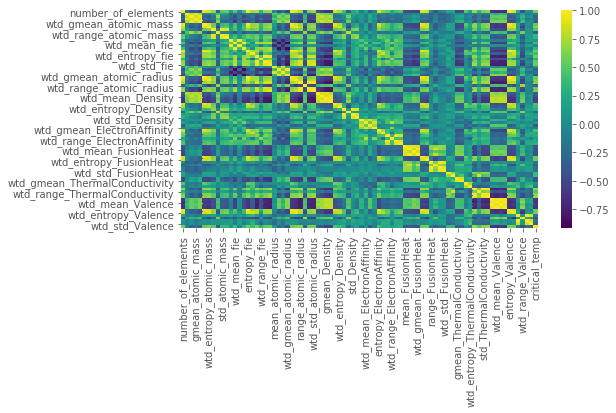

In [6]:
# correlation matrix heatmap
plt.figure(figsize=(8,4))
sns.heatmap(corr_mat, cmap = 'viridis');

In [7]:
# VIF to detect multicollinearity
X = data.drop(['critical_temp'], axis = 1)
vif = pd.DataFrame()
vif["VIF"] = np.linalg.inv(X.corr()).diagonal()
vif["features"] = X.columns
vif

,VIF,features
0,79.644423,number_of_elements
1,414.277383,mean_atomic_mass
2,818.370293,wtd_mean_atomic_mass
3,444.203673,gmean_atomic_mass
4,879.861538,wtd_gmean_atomic_mass
...,...,...
76,307.311308,wtd_entropy_Valence
77,56.759455,range_Valence
78,26.150907,wtd_range_Valence
79,96.823865,std_Valence


### Principal Component Regression



In [8]:
# design matrix
X = data[predictors].values

# response vector
y = data['critical_temp'].values


In [9]:
## PCA by hand to look at eigenstructure and explained ##

# standardizing design matrix
X_std = StandardScaler().fit_transform(X)

# creating PCA object
pca = PCA()

# doing PCA to find principal components
Z = pca.fit_transform(X_std)

# creating principal components dataframe to look at
Z_df = pd.DataFrame(data = Z, columns = list(range(1,82)))
Z_df

,1,2,3,4,5,6,7,8,9,10,...,72,73,74,75,76,77,78,79,80,81
0,-3.664487,0.991643,3.045260,1.713725,0.246057,-0.203213,0.450996,-0.220078,-0.384088,0.220391,...,-0.023332,0.008540,-0.009915,0.002499,0.000673,0.003487,0.005124,-0.003568,0.005670,-0.004764
1,-4.555468,-0.214585,1.722873,1.111493,0.981005,-1.011501,-0.245300,0.214118,0.408239,-1.139334,...,0.036476,0.095869,-0.020918,-0.030095,0.000062,0.021723,0.011310,-0.006537,0.001735,-0.004198
2,-3.488176,1.055167,3.130821,1.811590,0.296335,-0.211822,0.485278,0.010470,-0.496751,0.180617,...,-0.028371,-0.000143,-0.004124,0.001734,-0.000528,0.002263,0.003339,-0.006189,0.004832,-0.005472
3,-3.581284,1.020144,3.084663,1.760859,0.270516,-0.208458,0.466648,-0.108675,-0.439150,0.199967,...,-0.025976,0.004900,-0.007335,0.002157,0.000299,0.002886,0.004308,-0.004775,0.005329,-0.005093
4,-3.809671,0.948297,2.981358,1.627398,0.199680,-0.188464,0.426050,-0.426505,-0.279207,0.263086,...,-0.017537,0.012940,-0.013610,0.002931,0.000440,0.004618,0.006400,-0.001557,0.006026,-0.004206
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,2.350607,-0.387111,-1.449530,-2.426772,2.911041,-1.754652,0.114288,-1.041992,-0.186578,1.235675,...,-0.004106,-0.060863,-0.052370,0.018123,0.026375,0.024733,-0.016884,0.036880,0.000407,-0.012243
21259,-5.446209,-0.780202,1.336464,-0.290010,1.142610,0.236224,0.988120,-0.775729,0.324684,-0.793209,...,-0.013417,-0.003340,0.009971,0.017504,0.005504,-0.013596,-0.001798,0.006237,-0.000998,-0.001181
21260,10.477462,-0.931943,1.572640,-0.372598,-0.214181,-1.304829,-0.814939,0.052747,-0.720376,-0.347597,...,-0.066098,0.002647,0.008463,-0.018508,-0.001726,0.009524,0.013146,0.003719,0.007787,0.001225
21261,9.771885,-1.001345,1.215602,-0.872021,-0.954733,-0.674221,-0.754652,-1.624888,0.146395,-0.065916,...,-0.052065,0.003559,0.004636,-0.009418,-0.002175,0.009862,0.009411,-0.005655,0.008243,0.002287


In [10]:
## calculating cumulative explained variance ##

# getting eigenvalues and eigenvectors of the correlation matrix of the standardized design matrix
E, V = eig(X_std.T @ X_std)
print(E[0]/np.sum(E)) # explained variance for first principal component
cumvar = np.cumsum(pca.explained_variance_ratio_) # cumulative explained variance for all principal components
cumvar

0.38931798245375404


array([0.38931798, 0.49414007, 0.58935207, 0.66842937, 0.7272512 ,
       0.76513489, 0.8013574 , 0.83242847, 0.8560396 , 0.87581839,
       0.89410206, 0.90868803, 0.9204725 , 0.93045804, 0.9402828 ,
       0.94809799, 0.95528592, 0.96072059, 0.96555386, 0.96937062,
       0.97239336, 0.97525888, 0.97782371, 0.97989482, 0.981867  ,
       0.98372988, 0.98543026, 0.98685619, 0.98811913, 0.98927039,
       0.99029449, 0.99125491, 0.99217417, 0.99289294, 0.99357786,
       0.99419877, 0.99476954, 0.99526251, 0.99569935, 0.99612203,
       0.99644816, 0.99675418, 0.99701116, 0.99724859, 0.99747212,
       0.99768749, 0.997884  , 0.99807157, 0.99825233, 0.99842756,
       0.99858394, 0.99873775, 0.99886446, 0.99898456, 0.99910242,
       0.99920788, 0.99929714, 0.99937851, 0.99945842, 0.99953023,
       0.999595  , 0.9996519 , 0.99969627, 0.99974023, 0.99977965,
       0.99981497, 0.99984716, 0.99987529, 0.9998981 , 0.99991868,
       0.99993681, 0.99995349, 0.99996825, 0.99997748, 0.99998

0.9892703933612074


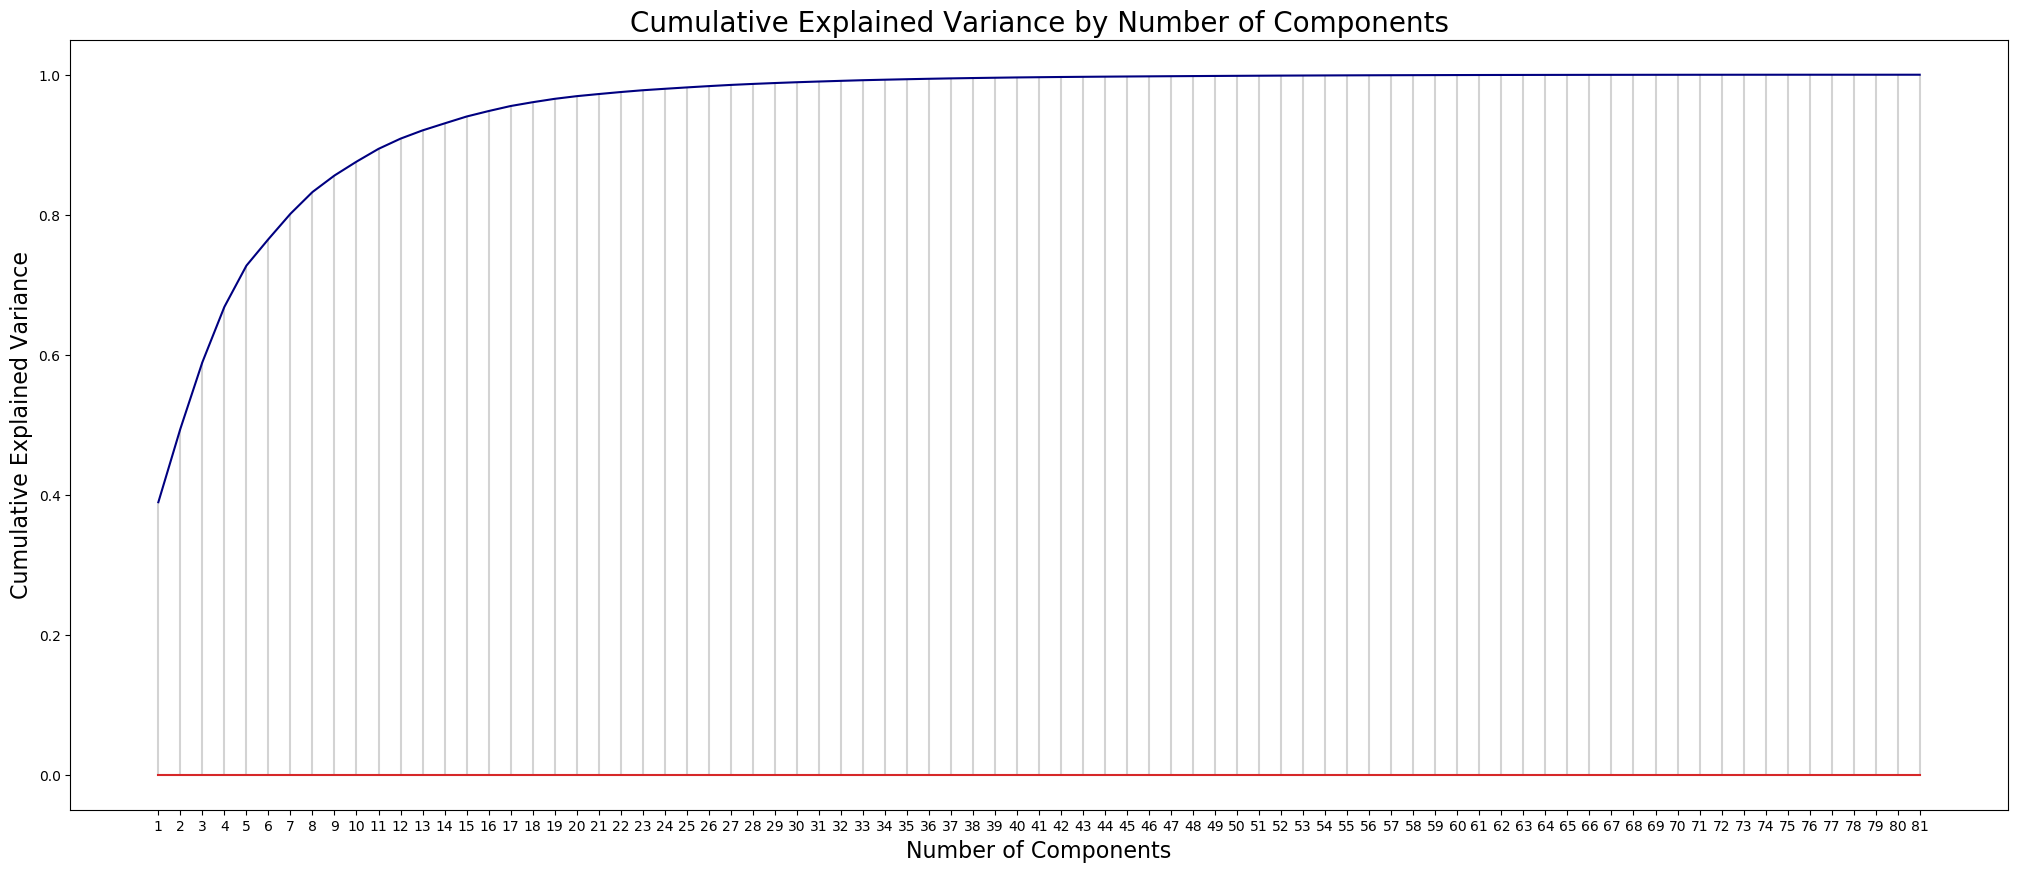

In [11]:
# making a plot for cumulative explained variance by the number of principal components
print(cumvar[29]) # looking at cumulative explained variance for first 30 principal components
plt.style.use('default') 
plt.figure(figsize = (25,10))
plt.stem(cumvar, linefmt = 'lightgrey', markerfmt = 'navy', use_line_collection = True)
plt.xticks(range(0,81), labels = list(range(1,82)))
plt.xlabel('Number of Components', fontsize = 16)
plt.ylabel('Cumulative Explained Variance', fontsize = 16);
plt.title('Cumulative Explained Variance by Number of Components', fontsize = 20);

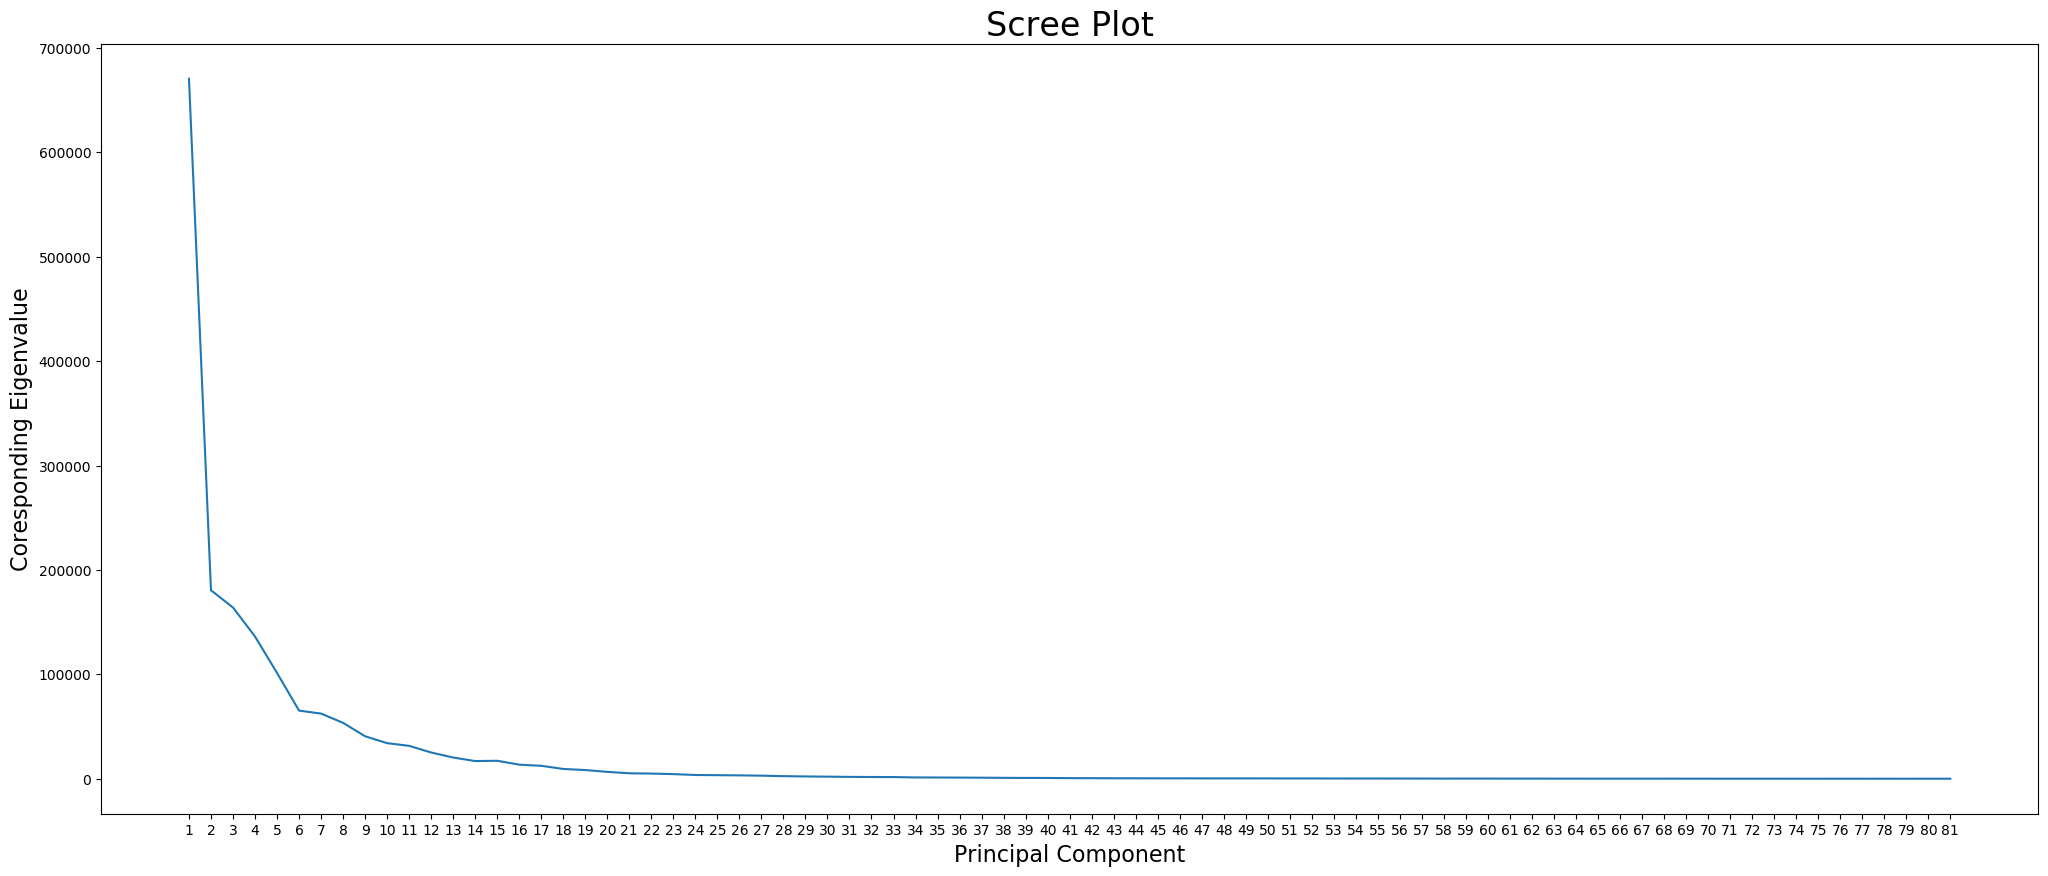

In [12]:
# making scree plot - shows eigenvalues by principal components
plt.style.use('default') 
plt.figure(figsize = (25,10))
plt.plot(E)
plt.xticks(range(0,81), labels = list(range(1,82)))
plt.xlabel('Principal Component', fontsize = 16)
plt.ylabel('Coresponding Eigenvalue', fontsize = 16);
plt.title('Scree Plot', fontsize = 24);

In [13]:
# a function to easily do PCR - source of code found in references section of paper

def pcr(predictors, response, pc):
    
    ''' Step 1: PCA on input data'''
    # Define the PCA object
    pca = PCA()
    
    # Preprocess (2) Standardize features by removing the mean and scaling to unit variance
    Xstd = StandardScaler().fit_transform(predictors)
    # Run PCA producing the reduced variable Xred and select the first pc components
    Z = pca.fit_transform(Xstd)[:,:pc]
    ''' Step 2: regression on selected principal components'''
    # Create linear regression object
    regr = LinearRegression()
    # Fit
    Z_reg = regr.fit(Z, response)
    # predicted values
    y_hat = regr.predict(Z)
    # Cross-validation
    y_cv = cross_val_predict(Z_reg, Z, response, cv=10)
    # Calculate scores for OG model and cross-validation models
    R2 = r2_score(response, y_hat)
    R2_cv = r2_score(response, y_cv)
    # Calculate mean square error for OG model and cross validation models
    mse = mean_squared_error(response, y_hat)
    mse_cv = mean_squared_error(response, y_cv)
    
    ''' Step 3: Defining coefficients of Models'''
    # coefficients of regressors for principal components regression
    E, V = eig(Xstd.T @ Xstd)
    Beta_Z = Z_reg.coef_
    Beta_X = V[:,:pc] @ Beta_Z
    
    print('R2: %5.3f'  % R2)
    print('R2 CV: %5.3f'  % R2_cv)
    print('MSE: %5.3f' % mse)
    print('MSE CV: %5.3f' % mse_cv)
    print('Intercept:', Z_reg.intercept_)
    print('Coefficients:', Z_reg.coef_)
    return(Z_reg, Beta_X, y_hat, y_cv, R2, R2_cv, mse, mse_cv)

In [14]:
# the following several lines of code show PCR results for different subsets of principal components

Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 20)

R2: 0.628
R2 CV: 0.613
MSE: 436.462
MSE CV: 454.233
Intercept: 34.42121913535249
Coefficients: [-4.0043751  -1.98810954  2.40200866 -1.25055204  2.56626636  3.42724176
 -0.76400443 -0.57528784 -1.9102399   0.09084165 -3.07758419 -1.93249279
  1.08631023  0.57218435  4.00960152 -0.30450643 -0.22193757 -4.80502217
  2.75139291  8.10565135]


In [15]:
Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 22)

R2: 0.631
R2 CV: 0.611
MSE: 432.988
MSE CV: 456.146
Intercept: 34.42121913535249
Coefficients: [-4.0043751  -1.98810954  2.40200866 -1.25055204  2.56626636  3.42724176
 -0.76400443 -0.57528784 -1.9102399   0.09084165 -3.07758419 -1.93249279
  1.08631023  0.57218435  4.00960152 -0.30450643 -0.22193757 -4.80502217
  2.75139291  8.10565135  2.9911842   2.35121154]


In [16]:
Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 24)

R2: 0.662
R2 CV: 0.643
MSE: 396.488
MSE CV: 418.672
Intercept: 34.42121913535249
Coefficients: [-4.0043751  -1.98810954  2.40200866 -1.25055204  2.56626636  3.42724176
 -0.76400443 -0.57528784 -1.9102399   0.09084165 -3.07758419 -1.93249279
  1.08631023  0.57218435  4.00960152 -0.30450643 -0.22193757 -4.80502217
  2.75139291  8.10565135  2.9911842   2.35121154 13.20875786 -1.22877303]


In [17]:
Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 26)

R2: 0.683
R2 CV: 0.665
MSE: 372.026
MSE CV: 392.737
Intercept: 34.42121913535249
Coefficients: [-4.0043751  -1.98810954  2.40200866 -1.25055204  2.56626636  3.42724176
 -0.76400443 -0.57528784 -1.9102399   0.09084165 -3.07758419 -1.93249279
  1.08631023  0.57218435  4.00960152 -0.30450643 -0.22193757 -4.80502217
  2.75139291  8.10565135  2.9911842   2.35121154 13.20875786 -1.22877303
 11.53167589  4.61912283]


In [18]:
Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 28)

R2: 0.683
R2 CV: 0.664
MSE: 371.771
MSE CV: 394.230
Intercept: 34.42121913535249
Coefficients: [-4.0043751  -1.98810954  2.40200866 -1.25055204  2.56626636  3.42724176
 -0.76400443 -0.57528784 -1.9102399   0.09084165 -3.07758419 -1.93249279
  1.08631023  0.57218435  4.00960152 -0.30450643 -0.22193757 -4.80502217
  2.75139291  8.10565135  2.9911842   2.35121154 13.20875786 -1.22877303
 11.53167589  4.61912283 -0.10150983  1.47960276]


In [19]:
Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 30)

R2: 0.684
R2 CV: 0.665
MSE: 370.615
MSE CV: 393.386
Intercept: 34.42121913535249
Coefficients: [-4.0043751  -1.98810954  2.40200866 -1.25055204  2.56626636  3.42724176
 -0.76400443 -0.57528784 -1.9102399   0.09084165 -3.07758419 -1.93249279
  1.08631023  0.57218435  4.00960152 -0.30450643 -0.22193757 -4.80502217
  2.75139291  8.10565135  2.9911842   2.35121154 13.20875786 -1.22877303
 11.53167589  4.61912283 -0.10150983  1.47960276 -0.32030094 -3.50477045]


In [20]:
Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc = 32)

R2: 0.689
R2 CV: 0.671
MSE: 364.506
MSE CV: 385.625
Intercept: 34.42121913535249
Coefficients: [-4.0043751  -1.98810954  2.40200866 -1.25055204  2.56626636  3.42724176
 -0.76400443 -0.57528784 -1.9102399   0.09084165 -3.07758419 -1.93249279
  1.08631023  0.57218435  4.00960152 -0.30450643 -0.22193757 -4.80502217
  2.75139291  8.10565135  2.9911842   2.35121154 13.20875786 -1.22877303
 11.53167589  4.61912283 -0.10150983  1.47960276 -0.32030094 -3.50477045
 -8.56518519 -0.55818074]


In [21]:
# just to see what the coefficients look like after transformed back to standardized design matrix units
print(Z_model.intercept_)
print(beta_X)

34.42121913535249
[-2.28790483  2.0633908  -4.09808287  1.80051892 -2.18522483 -1.59642777
  4.91236008 -0.63472402 -5.89443804  1.0918728  -4.16817244 -5.11309078
  0.71722652 -4.66932305  1.45293532 -1.26860641 -3.39630532 -4.19571524
  5.09361797 -4.53881036 -3.92580785 -2.06712801 -3.36666524 -2.08334671
 -2.5463575  -1.34868005  0.95907312 -0.68602438  0.68173371  0.28628743
 -0.42842928 -0.81650861  0.4983264   1.76862834  2.43257555 -2.31371618
 -4.87474776 -3.71618483  8.7316816  -2.81386736 -1.86150148  3.34198543
 -2.89874954  2.57090749 -4.60782498 -1.47593288 -0.40700841  2.19455327
 -4.33790033  3.11583104  1.70927745  0.01050563 -1.46225311  0.86129315
 -0.74183613 -0.72568296 -1.97284422 -0.15399837  0.93606586 -0.19850316
 -0.6481243  -2.09970279 -0.09271967 -2.62589839 -4.1205202   0.34098704
  3.24923026 -0.95819345  1.80425081 -0.49060308  0.83372061  3.19624716
 -1.67888281  3.25598313 -1.19507901 -1.44045481  1.58291536  1.34638562
 -0.65874322  2.75288802 -1.70811

R2: 0.684
R2 CV: 0.665
MSE: 370.615
MSE CV: 393.386
Intercept: 34.42121913535249
Coefficients: [-4.0043751  -1.98810954  2.40200866 -1.25055204  2.56626636  3.42724176
 -0.76400443 -0.57528784 -1.9102399   0.09084165 -3.07758419 -1.93249279
  1.08631023  0.57218435  4.00960152 -0.30450643 -0.22193757 -4.80502217
  2.75139291  8.10565135  2.9911842   2.35121154 13.20875786 -1.22877303
 11.53167589  4.61912283 -0.10150983  1.47960276 -0.32030094 -3.50477045]


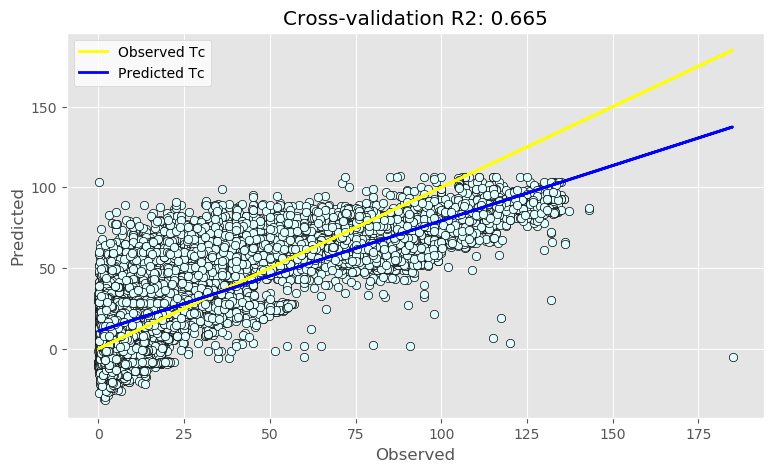

In [22]:
# for final model and for plotting
Z_model, beta_X, predicted, predicted_cv, r2, r2_cv, mse, mse_cv = pcr(X, y, pc=30)


# fitting a regression line for plotting
z = np.polyfit(y, predicted, 1)

# plotting the predicted values by the observed values to show how well the model predicted critical temperature and also
# to plot the regression line
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize = (9, 5))
    ax.scatter(y, predicted, c = 'lightcyan', edgecolors = 'k')
    ax.plot(y, y, c = 'yellow', linewidth = 2, label = 'Observed Tc') # can't make a dashed line for reasons I do not understand
    ax.plot(y, z[1] + z[0]*y, c ='blue', linewidth = 2, label = 'Predicted Tc')
    plt.title('Cross-validation R2: ' + str(round(r2_cv,3)))
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    ax.legend(loc = 'upper left', facecolor = 'white');
    plt.show()

In [23]:
# a function I either made myself or found (can't remember or find source) to find calculate five-number summary of a vector
def summary_stats(data):

    # calculate quartiles
    quartiles = np.percentile(data, [25, 50, 75])
    # calculate min/max
    data_min, data_max = data.min(), data.max()
    # print 5-number summary
    print('Min: %.3f' % data_min)
    print('Q1: %.3f' % quartiles[0])
    print('Median: %.3f' % quartiles[1])
    print('Q3: %.3f' % quartiles[2])
    print('Max: %.3f' % data_max)


# comparing five-number summaries between observed and predicted values
summary_stats(predicted)
summary_stats(y)

Min: -31.940
Q1: 9.228
Median: 30.752
Q3: 60.295
Max: 106.956
Min: 0.000
Q1: 5.365
Median: 20.000
Q3: 63.000
Max: 185.000


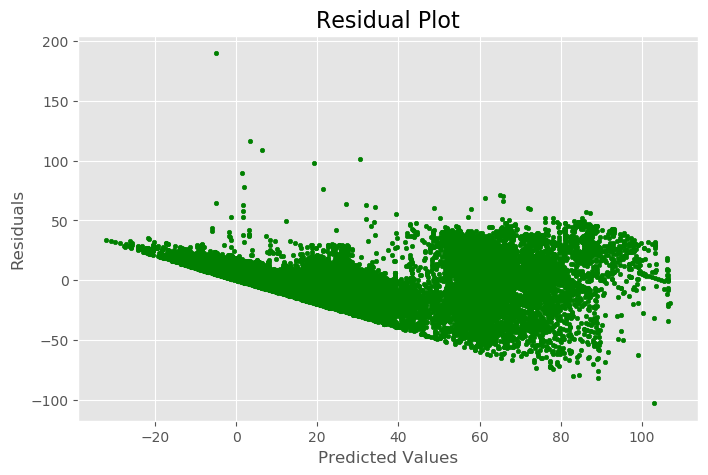

In [24]:
## plots for residual analysis ## 
  
# setting plot style 
plt.style.use('ggplot') 
  
# plotting residual errors 
plt.figure(figsize = (8,5))
plt.scatter(predicted, y - predicted, 
            color = "green", s = 10)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# plot title 
plt.title("Residual Plot", fontsize = 16); 

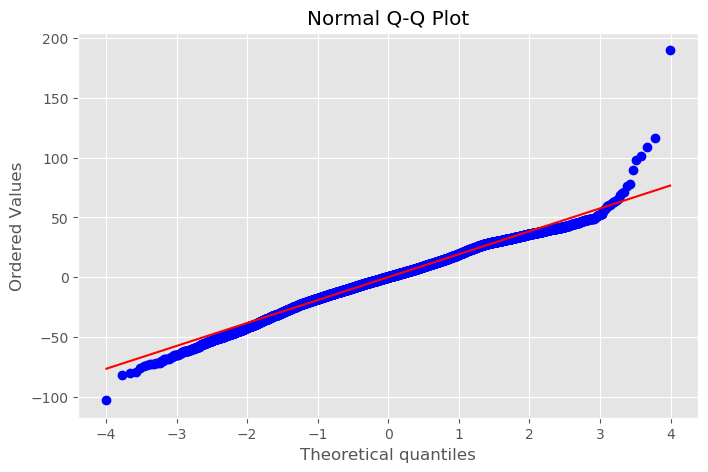

In [25]:
# qq-plot of residuals
plt.figure(figsize = (8,5))
stats.probplot(y - predicted, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot");

In [26]:
# this cell contains code that was used to compare particular elements one at a time
# notice that I did not drop the 'Oxygen' ('O') element from the dataset 'data' - want to use it for regression analysis and
# to demonstrate using an indicator variable with PCR

data_elements = pd.read_csv('unique_m.csv')
data = pd.read_csv('train.csv')

data_elements = data_elements.drop(['critical_temp'], axis = 1)
data = pd.concat([data, data_elements], axis = 1)
data = data.drop(['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'F', 'Ne','Na', 
                  'Mg', 'Al', 'Si', 'P', 'S', 'Cl','Ar', 'K','Ca', 'Sc', 'Ti', 
                  'V', 'Cr', 'Mn', 'Pb', 'Co','Ni', 'Cu', 'Zn', 'Ga', 'Ge', 
                  'As', 'Se', 'Br', 'Kr', 'Rb','Sr', 'Y', 'Zr', 'Nb', 'Mo', 
                  'Tc', 'Ru', 'Rh', 'Pd', 'Ag','Cd', 'In', 'Sn', 'Sb', 'Te', 
                  'I', 'Xe', 'Cs', 'Ba', 'La','Ce', 'Pr', 'Nd', 'Pm', 'Sm', 
                  'Eu', 'Gd', 'Tb', 'Dy', 'Ho','Er', 'Tm', 'Yb', 'Lu', 'Hf', 
                  'Ta', 'W', 'Re', 'Os', 'Ir','Pt', 'Au', 'Hg', 'Tl', 'Fe', 
                  'Bi', 'Po', 'At', 'Rn', 'material'], axis = 1)

data_elements = data_elements[['H', 'He', 'Li', 'Be', 'B', 'C', 'N', 'O', 'F', 'Ne', 'Na', 'Mg', 'Al',
       'Si', 'P', 'S', 'Cl', 'Ar', 'K', 'Ca', 'Sc', 'Ti', 'V', 'Cr', 'Mn',
       'Fe', 'Co', 'Ni', 'Cu', 'Zn', 'Ga', 'Ge', 'As', 'Se', 'Br', 'Kr', 'Rb',
       'Sr', 'Y', 'Zr', 'Nb', 'Mo', 'Tc', 'Ru', 'Rh', 'Pd', 'Ag', 'Cd', 'In',
       'Sn', 'Sb', 'Te', 'I', 'Xe', 'Cs', 'Ba', 'La', 'Ce', 'Pr', 'Nd', 'Pm',
       'Sm', 'Eu', 'Gd', 'Tb', 'Dy', 'Ho', 'Er', 'Tm', 'Yb', 'Lu', 'Hf', 'Ta',
       'W', 'Re', 'Os', 'Ir', 'Pt', 'Au', 'Hg', 'Tl', 'Pb', 'Bi', 'Po', 'At',
       'Rn']]

data

,number_of_elements,mean_atomic_mass,wtd_mean_atomic_mass,gmean_atomic_mass,wtd_gmean_atomic_mass,entropy_atomic_mass,wtd_entropy_atomic_mass,range_atomic_mass,wtd_range_atomic_mass,std_atomic_mass,...,gmean_Valence,wtd_gmean_Valence,entropy_Valence,wtd_entropy_Valence,range_Valence,wtd_range_Valence,std_Valence,wtd_std_Valence,critical_temp,O
0,4,88.944468,57.862692,66.361592,36.116612,1.181795,1.062396,122.90607,31.794921,51.968828,...,2.213364,2.219783,1.368922,1.066221,1,1.085714,0.433013,0.437059,29.00,4.0
1,5,92.729214,58.518416,73.132787,36.396602,1.449309,1.057755,122.90607,36.161939,47.094633,...,1.888175,2.210679,1.557113,1.047221,2,1.128571,0.632456,0.468606,26.00,4.0
2,4,88.944468,57.885242,66.361592,36.122509,1.181795,0.975980,122.90607,35.741099,51.968828,...,2.213364,2.232679,1.368922,1.029175,1,1.114286,0.433013,0.444697,19.00,4.0
3,4,88.944468,57.873967,66.361592,36.119560,1.181795,1.022291,122.90607,33.768010,51.968828,...,2.213364,2.226222,1.368922,1.048834,1,1.100000,0.433013,0.440952,22.00,4.0
4,4,88.944468,57.840143,66.361592,36.110716,1.181795,1.129224,122.90607,27.848743,51.968828,...,2.213364,2.206963,1.368922,1.096052,1,1.057143,0.433013,0.428809,23.00,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21258,4,106.957877,53.095769,82.515384,43.135565,1.177145,1.254119,146.88130,15.504479,65.764081,...,3.223710,3.519911,1.377820,0.913658,1,2.168889,0.433013,0.496904,2.44,0.0
21259,5,92.266740,49.021367,64.812662,32.867748,1.323287,1.571630,188.38390,7.353333,69.232655,...,2.168944,2.038991,1.594167,1.337246,1,0.904762,0.400000,0.212959,122.10,11.0
21260,2,99.663190,95.609104,99.433882,95.464320,0.690847,0.530198,13.51362,53.041104,6.756810,...,4.472136,4.781762,0.686962,0.450561,1,3.200000,0.500000,0.400000,1.98,0.0
21261,2,99.663190,97.095602,99.433882,96.901083,0.690847,0.640883,13.51362,31.115202,6.756810,...,4.472136,4.665819,0.686962,0.577601,1,2.210000,0.500000,0.462493,1.84,0.0


In [27]:
# another five-number summary function (I definitely made this one myself) specifically to use on the elements dataset
# I just wanted to get a sense of how many superconductors had which elements and how much of that element they had

def summary_stats(df):
    '''seven number summary of a numerical vector'''
    global summary
    names = ['Size','Min','25th Percentile','Median','75th Percentile','Max','Mean','Standard Deviation']
    summary = pd.DataFrame(columns = names)
    elements = []
    for element in df.columns.values:
        if df[element].values.max() != 0:
            elements.append(element)
            x = df[df[element].values > 0]
            summaries = [len(x[element].values), round(x[element].values.min(),4), 
                         round(np.percentile(x[element].values, 25),4), 
                         round(np.percentile(x[element].values, 50),4), 
                         round(np.percentile(x[element].values, 75),4), 
                         round(x[element].values.max(),4), 
                         round(x[element].values.mean(),4), 
                         round(x[element].values.std(),4)]
            summaries = pd.DataFrame([summaries], columns = names)
            summary = summary.append(summaries)
    summary = summary.set_index([elements])
    return summary

# it shows the number of super conductors that contain a particular element 'Size' along with the five-number summary
# for instance, 299 superconductors contained Hydrogen and the superconductor that had the 
# most hydrogen had 14 (not sure about units)

summary_stats(data_elements)
summary.head()

,Size,Min,25th Percentile,Median,75th Percentile,Max,Mean,Standard Deviation
H,299,0.005,0.2760,0.75,1.5,14.0,1.2576,1.8757
Li,311,0.010,0.2000,0.90,1.0,3.0,0.8290,0.6858
Be,96,0.010,0.9305,1.50,14.0,40.0,7.6719,10.0438
B,1205,0.010,2.0000,2.00,2.0,105.0,2.5162,3.6438
C,1274,0.002,1.0000,1.00,1.2,120.0,6.4251,16.8960


In [28]:
# looking at all elements what were found in more than 2,000 superconductors
# this is how I decided which elements to play with, eventually choosing Oxygen because of its clear PCA score plot
summary[summary.Size > 2000]

,Size,Min,25th Percentile,Median,75th Percentile,Max,Mean,Standard Deviation
O,11964,0.0020,3.000,6.39,7.0000,66.0,5.3480,3.6485
Ca,4112,0.0022,0.500,1.00,2.0000,24.0,1.3359,1.6656
Fe,2339,0.0010,0.875,1.00,1.8855,30.0,1.3925,1.7019
Cu,10838,0.0040,1.000,2.80,3.0000,98.0,2.5048,2.3251
Sr,4852,0.0100,0.500,1.85,2.0000,16.7,1.4326,0.9855
Y,4075,0.0010,0.800,1.00,1.0000,9.0,0.9265,0.5203
Ba,6751,0.0050,1.600,2.00,2.0000,24.0,1.7904,0.9259
La,3463,0.0010,0.850,1.00,1.8500,98.0,1.6268,5.5547
Bi,2389,0.0105,1.000,2.00,2.0000,14.0,1.7891,0.9940


In [29]:
# restructuring data to do PCA and eventually introduce indicator variable
dataO = data[data['O'] > 0].reset_index()
yO = dataO['critical_temp']
dataO = dataO.drop(['index','critical_temp', 'O'], axis = 1)

dataNO = data[data['O'] == 0].reset_index()
yNO = dataNO['critical_temp']
dataNO = dataNO.drop(['index','critical_temp', 'O'], axis = 1)

y = pd.DataFrame(yNO)
y = y.append(pd.DataFrame(data = yO), ignore_index = True)

X_model = dataNO.append(dataO, ignore_index = True)

# making oxygen into an indicator variable through factorization
Oxygen0 = data['O'][data['O'] == 0].reset_index().drop(['index'], axis = 1)
Oxygen1 = pd.DataFrame({'O': np.ones(11964)})

Oxygen_edit = Oxygen0.append(Oxygen1, ignore_index = True)
Oxygen = Oxygen_edit.apply(lambda x: x.factorize()[0])

len(Oxygen[Oxygen['O'] == 1]) # correct size

11964

In [30]:
## PCR by hand to carefully account for indicator variable ##

# standardizing data
X_std = StandardScaler().fit_transform(X_model)

# creating PCA object
pca = PCA()

# principal components
Z = pca.fit_transform(X_std)[:,:30]

# creating principal components dataframe to look at
Z_pca = pd.DataFrame(data = Z, columns = list(range(1,31)))

# introducing indicator variable
Z_df = pd.concat([Oxygen, Z_pca], axis = 1)

# Create linear regression object
regr = LinearRegression()

# Fit
Z_reg = regr.fit(Z_df, y)

# predicted values
y_hat = regr.predict(Z_df)

# Cross-validation
y_cv = cross_val_predict(Z_reg, Z_df, y, cv=10)

# Calculate scores for OG model and cross-validation models
R2 = r2_score(y, y_hat)
R2_cv = r2_score(y, y_cv)

# Calculate mean square error for OG model and cross validation models
mse = mean_squared_error(y, y_hat)
mse_cv = mean_squared_error(y, y_cv)
    
print('R2: %5.3f'  % R2)
print('R2 CV: %5.3f'  % R2_cv)
print('MSE: %5.3f' % mse)
print('MSE CV: %5.3f' % mse_cv)
print('Intercept:', Z_reg.intercept_)
print('Coefficients:', Z_reg.coef_)

R2: 0.686
R2 CV: 0.656
MSE: 368.548
MSE CV: 403.463
Intercept: [28.82982715]
Coefficients: [[ 9.93729253 -3.23169141 -1.81682259  2.01306616 -1.48726098  2.58743759
   3.15861041 -0.7907657  -0.63123991 -1.56984401  0.20729968 -3.35350092
  -2.03178869  0.75044176  0.96075807  3.71749818 -0.70586078 -0.48374429
  -4.69441084  2.76758831  7.58549258  2.13931023  2.81232504 12.68690145
  -2.03275236 11.9300135   4.88724895 -0.70931789  1.47261717  0.07934494
  -3.29396546]]


In [31]:
# making observed values into a usable vector
yvec = y['critical_temp']

# making sure I subset the observed and predicted values correctly
print(len(yvec[:9299])) # number of observations for super conductors without oxygen = 9299
print(len(yvec[9299::])) # number of observations for super conductors with oxygen = 11964
print(len(yvec[:9299]) + len(yvec[9299::])) # total observations

9299
11964
21263


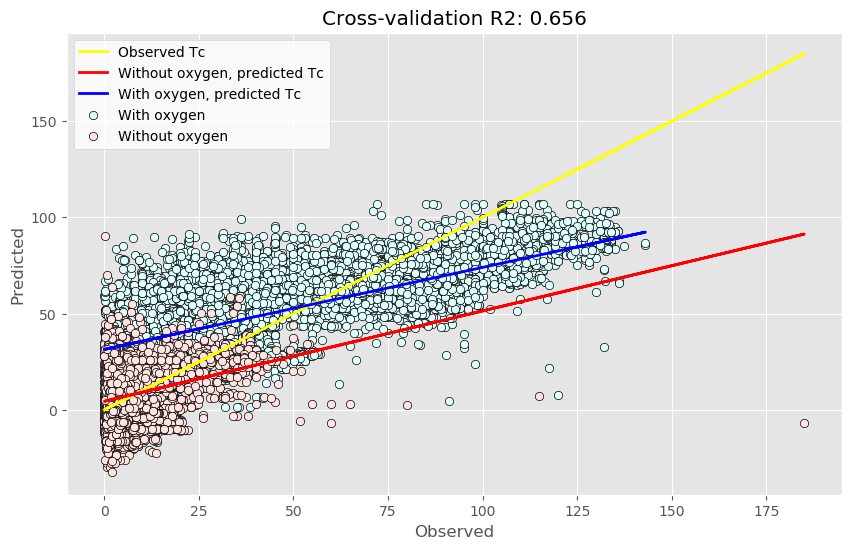

In [32]:

# fitting regression lines for plotting
z0 = np.polyfit(yvec[:9299], y_hat[:9299], 1)
z1 = np.polyfit(yvec[9299::], y_hat[9299::], 1)

# plotting the predicted values by the observed values to show how well the model predicted critical temperature and also
# to plot the regression lines
with plt.style.context(('ggplot')):
    fig, ax = plt.subplots(figsize = (10, 6))
    ax.scatter(yvec[9299::], y_hat[9299::], c = 'lightcyan', edgecolors = 'k', label = 'With oxygen')
    ax.scatter(yvec[:9299], y_hat[:9299], c = 'mistyrose', edgecolors = 'k', label= 'Without oxygen')
    ax.plot(yvec, yvec, c ='yellow', linewidth = 2, label = 'Observed Tc') # still can't coerce a dashed line
    ax.plot(yvec[:9299], z0[1] + z0[0]*yvec[:9299], c ='red', linewidth = 2, label = 'Without oxygen, predicted Tc')
    ax.plot(yvec[9299::], z1[1] + z1[0]*yvec[9299::], c ='blue', linewidth = 2, label = 'With oxygen, predicted Tc')
    plt.title('Cross-validation R2: ' + str(round(R2_cv,3)))
    plt.xlabel('Observed')
    plt.ylabel('Predicted')
    ax.legend(loc = 'upper left', facecolor = 'white');
    plt.show()

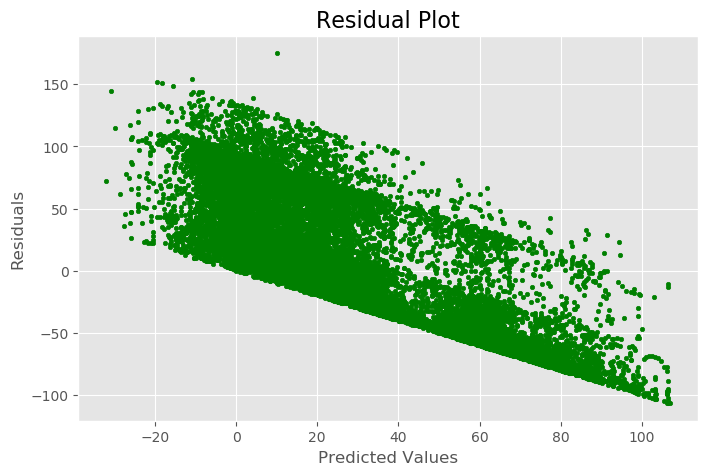

In [33]:
## plots for residual analysis ##
  
# setting plot style 
plt.style.use('ggplot') 
  
# plotting residual errors 
plt.figure(figsize = (8,5))
plt.scatter(predicted, yvec - predicted, 
            color = "green", s = 10)
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')

# plot title 
plt.title("Residual Plot", fontsize = 16); 

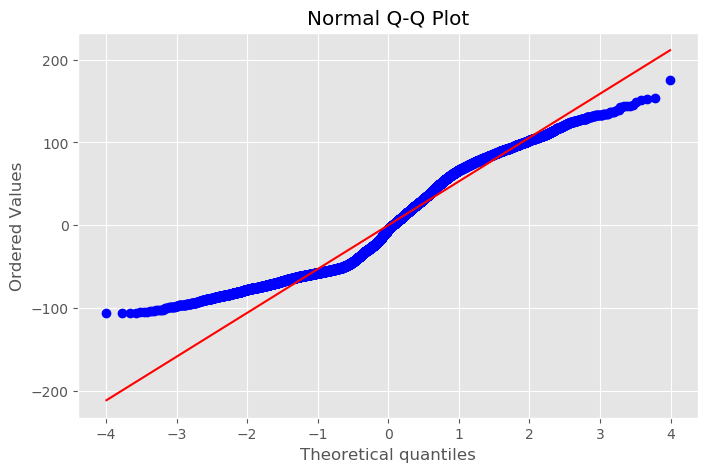

In [34]:
# qq-plot of residuals
plt.figure(figsize = (8,5))
stats.probplot(yvec - predicted, dist="norm", plot=plt)
plt.title("Normal Q-Q Plot");